1. Choose a corpus you will work with. You can work with the BBC news corpus provided here, or choose one of the corpora that come with NLTK. You can also take just one topic of the BBC corpus provided.

In [104]:
# Importing  ALL the necessary libraries

import pandas as pd  # For data manipulation and handling csv files
import nltk  # For natural language processing tasks
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
from nltk.corpus import stopwords  # To load a list of common English stopwords
stop_words = set(stopwords.words('english'))  # Set of common stopwords for filtering
from nltk.util import ngrams  # To generate n-grams (bigrams, trigrams) from text
from nltk.tokenize import word_tokenize  # To tokenize text into words
import string  # To handle and remove punctuation
punctuation = set(string.punctuation)  # Set of punctuation symbols for filtering
from nltk.probability import FreqDist  # To create frequency distributions of words
from wordcloud import WordCloud  # For generating word cloud visualizations


# Downloading NLTK resources 
nltk.download('punkt')  # Download tokenizer resource for splitting text into words
nltk.download('stopwords')  # Download stopwords list for filtering common words




[nltk_data] Downloading package punkt to /Users/sarinous/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sarinous/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

2. Load the corpus into an object. You can use a pandas DataFrame, or a list. If the corpus has more than one condition, load each one into its separate object.

In [105]:
# your code here

# Load data from BBC corpus (category + text)
data = pd.read_csv('bbc-text.csv')

# Dictionary to hold data for each category (tech, business, sport, entertainment and politics)
each_category = {}

# Loop to get unique category 
for category in data['category'].unique():
    each_category[category] = data[data['category'] == category]

# Loop to display each category
for category, df in each_category.items():
    print(f"Category: {category}")
    print(df.head(4))  
    print( )



Category: tech
   category                                               text
0      tech  tv future in the hands of viewers with home th...
19     tech  games maker fights for survival one of britain...
20     tech  security warning over  fbi virus  the us feder...
21     tech  halo 2 heralds traffic explosion the growing p...

Category: business
    category                                               text
1   business  worldcom boss  left books alone  former worldc...
11  business  virgin blue shares plummet 20% shares in austr...
12  business  crude oil prices back above $50 cold weather a...
15  business  s korean credit card firm rescued south korea ...

Category: sport
  category                                               text
2    sport  tigers wary of farrell  gamble  leicester say ...
3    sport  yeading face newcastle in fa cup premiership s...
7    sport  henman hopes ended in dubai third seed tim hen...
8    sport  wilkinson fit to face edinburgh england captai...

Ca

3. Calculate and print the number of paragraphs in the text, by condition, if necessary, if that information is available (paras method in nltk, or if you can see another way, you can use that).

In [106]:
# your code here

# Dictionary to hold the number of paragraphs for each category
num_paragraphs = {}

# Loop to calculate the number of paragraphs in each category
for category in data['category'].unique():
    # Filter the DataFrame for the current category
    category_text = data[data['category'] == category]['text']
    
    # Count the paragraphs
    paragraphs_count = category_text.apply(lambda x: len(x.split('\n\n')))
    
    # Store the total number of paragraphs
    num_paragraphs[category] = paragraphs_count.sum()

# Loop to print the number of paragraphs by category
for category, count in num_paragraphs.items():
    print(f"Category: {category} --> Number of paragraphs: {count}")
    print( )


Category: tech --> Number of paragraphs: 401

Category: business --> Number of paragraphs: 510

Category: sport --> Number of paragraphs: 511

Category: entertainment --> Number of paragraphs: 386

Category: politics --> Number of paragraphs: 417



4. Calculate and print the number of sentences in the text, by condition if necessary.

In [107]:
# your code here

# Dictionary to hold the number of sentences for each category
num_sentences = {}

# Loop to calculate the number of sentences in each category
for category in data['category'].unique():
    # Filter the DataFrame for the current category
    category_text = data[data['category'] == category]['text']
    
    # Count the sentences
    sentences_count= category_text.apply(lambda x: len(nltk.sent_tokenize(x)))
    
    # Store the total number of sentences
    num_sentences[category] = sentences_count.sum()

# Loop to print the number of sentences by category
for category, count in num_sentences.items():
    print(f"Category: {category} --> Number of sentences: {count}")
    print( )



Category: tech --> Number of sentences: 9318

Category: business --> Number of sentences: 7608

Category: sport --> Number of sentences: 8397

Category: entertainment --> Number of sentences: 5960

Category: politics --> Number of sentences: 8414



5. Calculate and print the number of words in the text, by condition if necessary.

In [108]:
# your code here

# Dictionary to hold the number of words in the text for each category
num_words = {}

# Loop to calculate the number of words in each category 
for category in data['category'].unique():
    # Filter the DataFrame for the current category
    category_texts = data[data['category'] == category]['text']
    
    # Count the words
    words_count = category_texts.apply(lambda x: len(nltk.word_tokenize(x)))
    
    # Store the total number of words
    num_words[category] = words_count.sum()

# Print the number of words by category
for category, count in num_words.items():
    print(f"Category: {category} --> Number of words: {count}")
    print( )


Category: tech --> Number of words: 214265

Category: business --> Number of words: 181520

Category: sport --> Number of words: 182686

Category: entertainment --> Number of words: 137620

Category: politics --> Number of words: 201520



6. Load a stopword list and calculate the number of words without stopwords, by condition if necessary.

In [109]:
# your code here

# Dictionary to hold the number of words without stopwords for each category
num_words_without_stopwords = {}

# Loop to calculate the number of words without stopwords 
for category in data['category'].unique():
    # Filter the DataFrame for the current category
    category_text = data[data['category'] == category]['text']
    
    # Calculate the number of words without stopwords
    words_without_stopwords_count = category_text.apply(
        lambda x: len([word for word in nltk.word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])
    )
    
    # Store the total number of words without stopwords for this category
    num_words_without_stopwords[category] = words_without_stopwords_count.sum()

# Print the number of words without stopwords by category
for category, count in num_words_without_stopwords.items():
    print(f"Category: {category} --> Number of words without stopwords: {count}")
    print()



Category: tech --> Number of words without stopwords: 109550

Category: business --> Number of words without stopwords: 94943

Category: sport --> Number of words without stopwords: 89608

Category: entertainment --> Number of words without stopwords: 71458

Category: politics --> Number of words without stopwords: 103100



7. Create a FreqDist object for most commonly used words (without stopwords), by condition, if necessary.

In [110]:
# your code here

# Dictionary to hold FreqDist for each category
freqdist_by_category = {}

# Loop to calculate word frequencies in each category
for category in data['category'].unique():
    # Filter the DataFrame for the current category
    category_text = data[data['category'] == category]['text']
    
    # Tokenize and filter out the stopwords
    words = [
        word.lower() for text in category_text
        for word in nltk.word_tokenize(text) 
        if word.isalpha() and word.lower() not in stop_words
    ]
    
    # Create a FreqDist object for the current category
    freqdist_by_category[category] = FreqDist(words)

# Loop to display the most common words for each category
for category, freqdist in freqdist_by_category.items():
    print(f"\nCategory: {category}")
    print(freqdist.most_common(8))





Category: tech
[('said', 1567), ('people', 960), ('also', 537), ('new', 517), ('mr', 509), ('technology', 504), ('one', 498), ('would', 471)]

Category: business
[('said', 1680), ('us', 813), ('year', 637), ('mr', 600), ('would', 463), ('also', 440), ('market', 425), ('new', 416)]

Category: sport
[('said', 941), ('game', 476), ('england', 459), ('first', 437), ('win', 415), ('would', 396), ('world', 379), ('last', 376)]

Category: entertainment
[('said', 825), ('film', 753), ('best', 591), ('music', 435), ('also', 398), ('us', 369), ('year', 368), ('one', 362)]

Category: politics
[('said', 2241), ('mr', 1678), ('would', 1051), ('labour', 760), ('government', 730), ('people', 623), ('blair', 573), ('party', 569)]


8. Create a histogram of most commonly used words, bigrams and trigrams, by condition, if necessary.


Category: tech


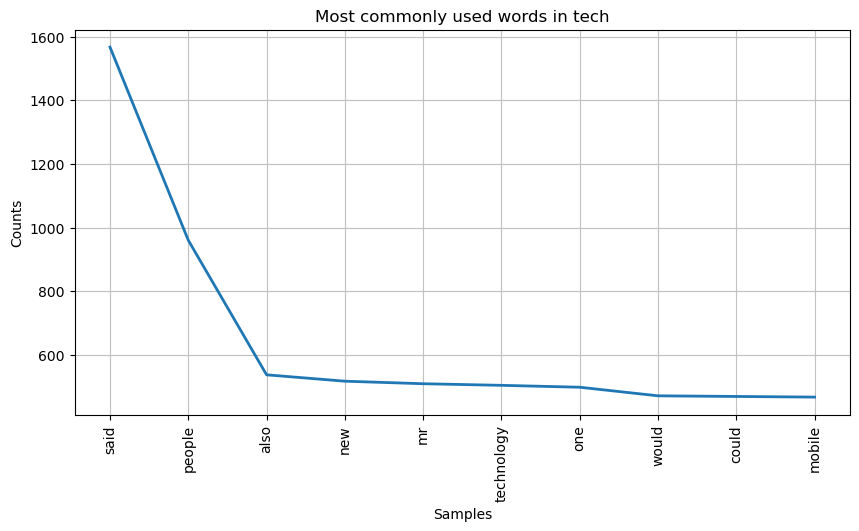

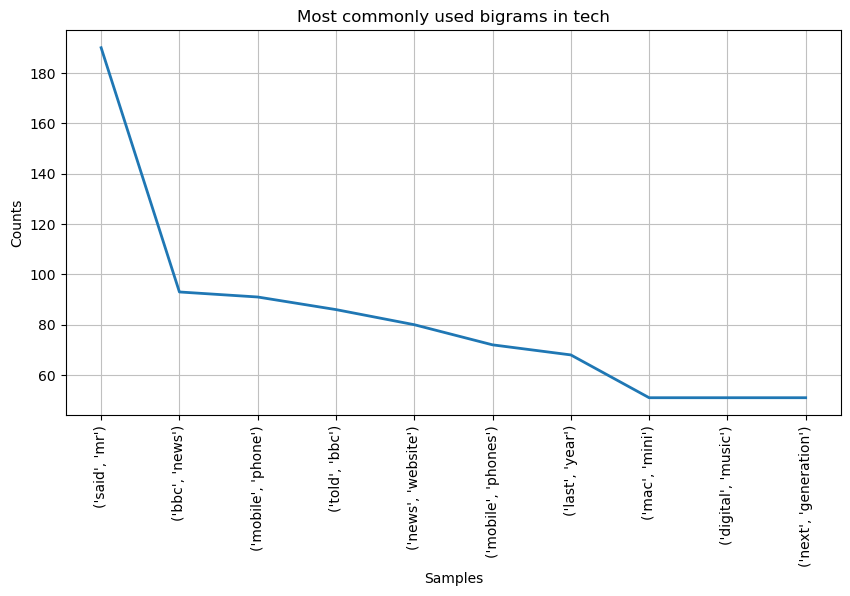

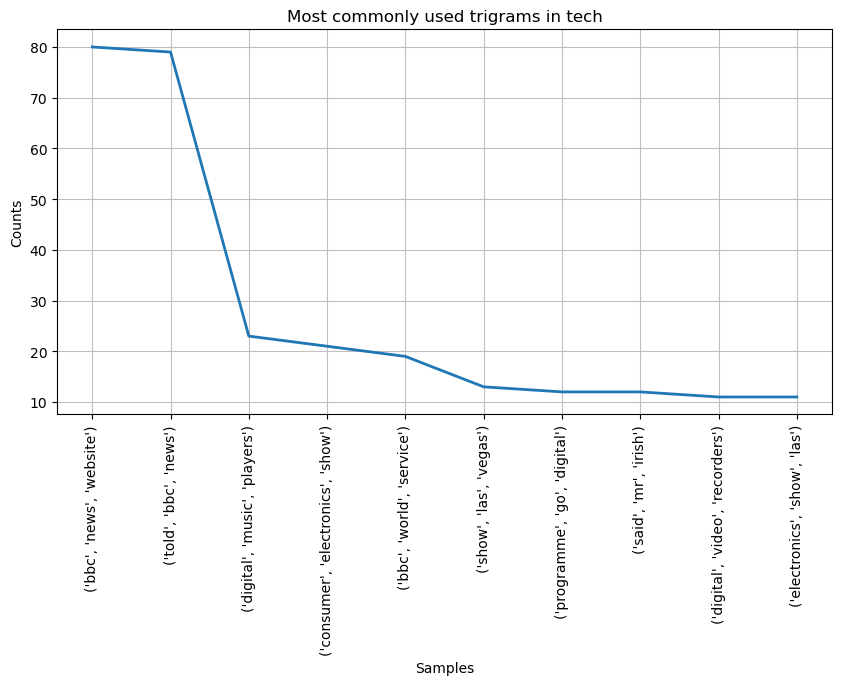


Category: business


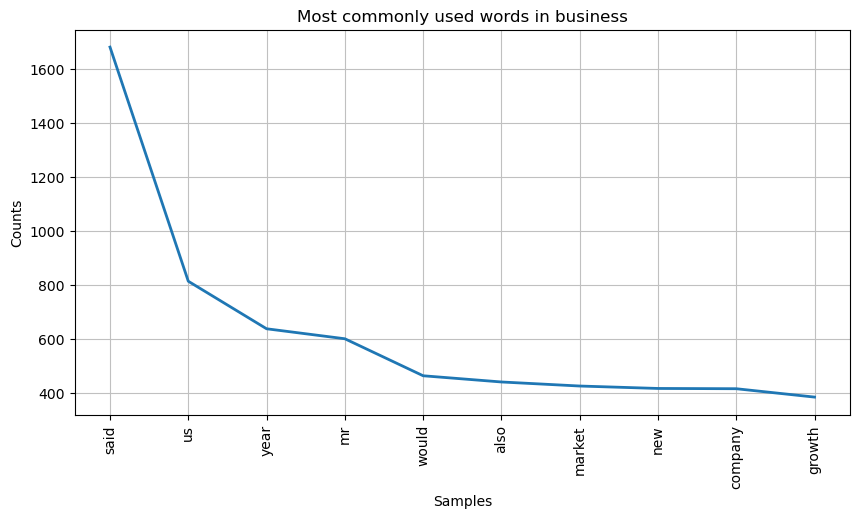

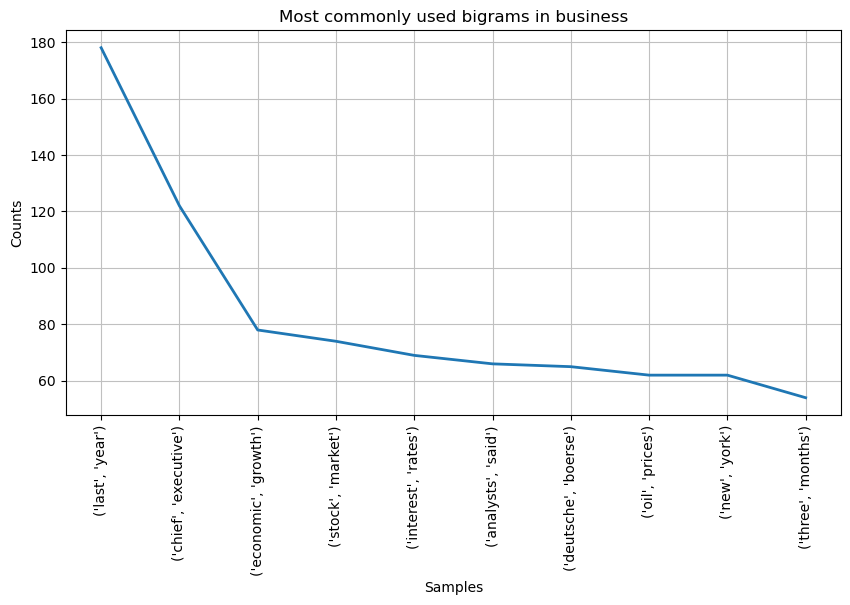

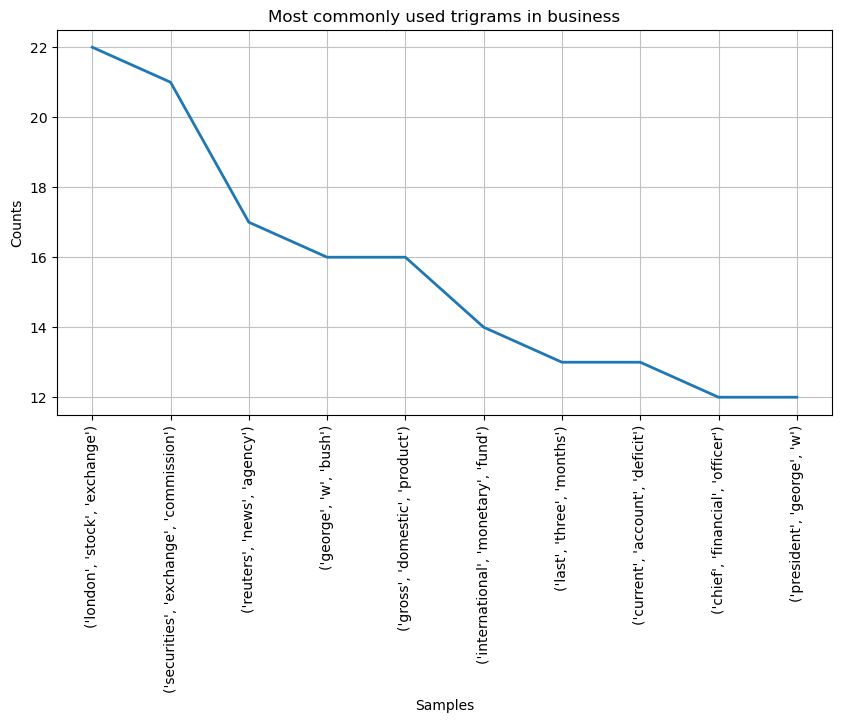


Category: sport


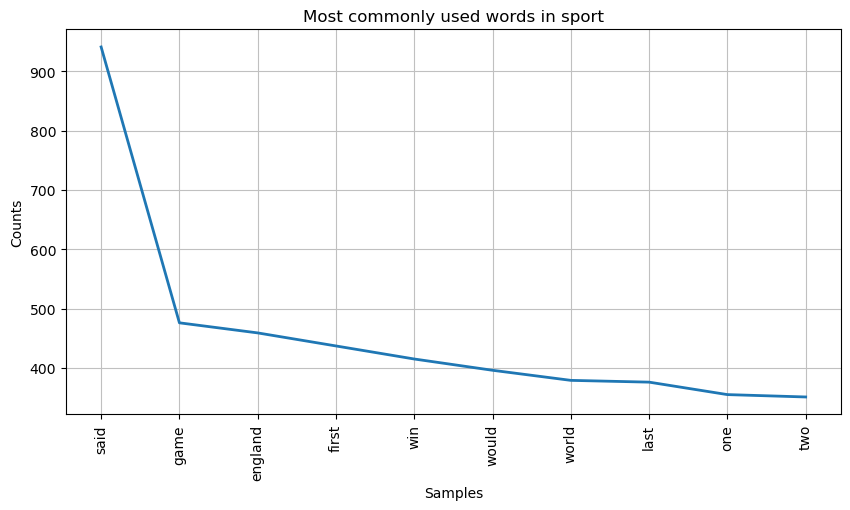

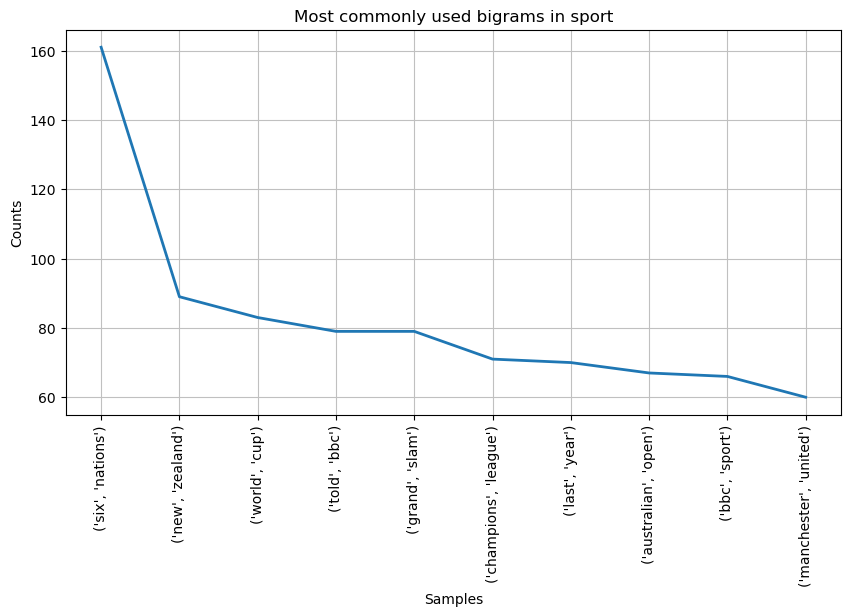

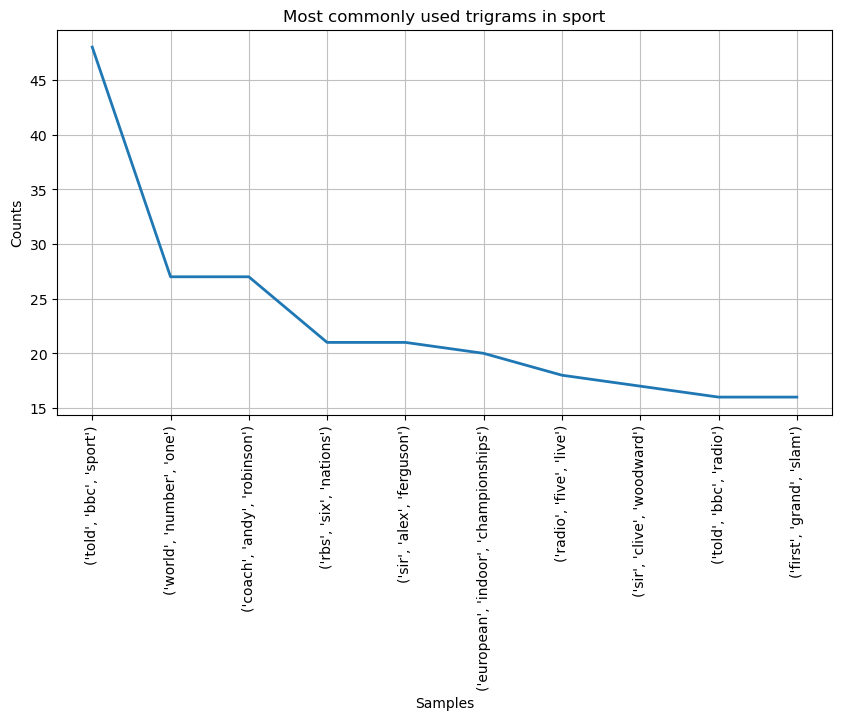


Category: entertainment


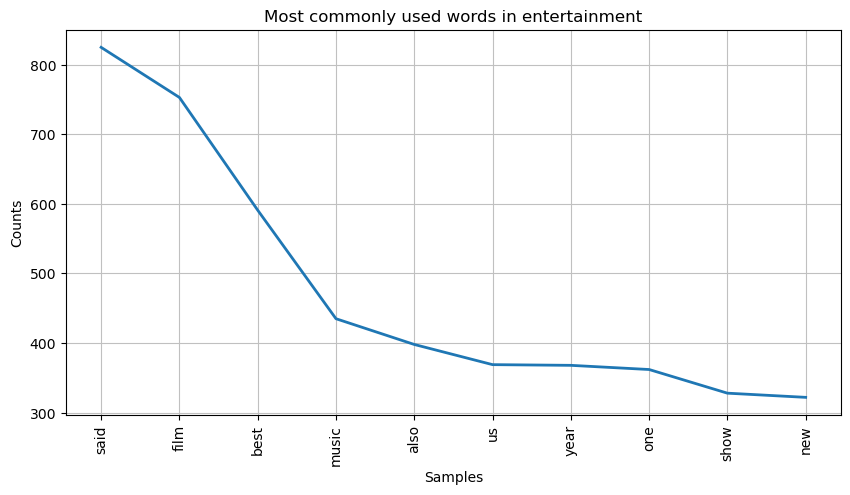

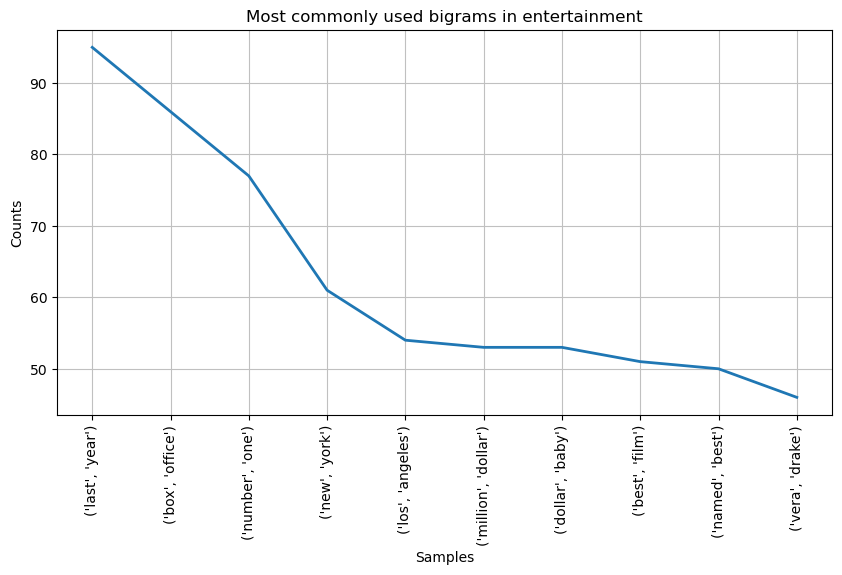

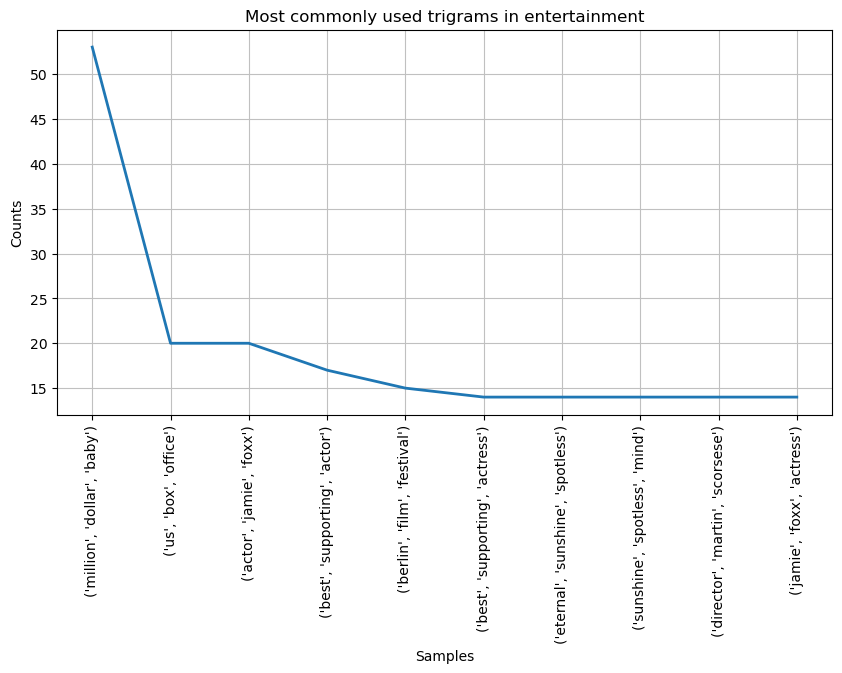


Category: politics


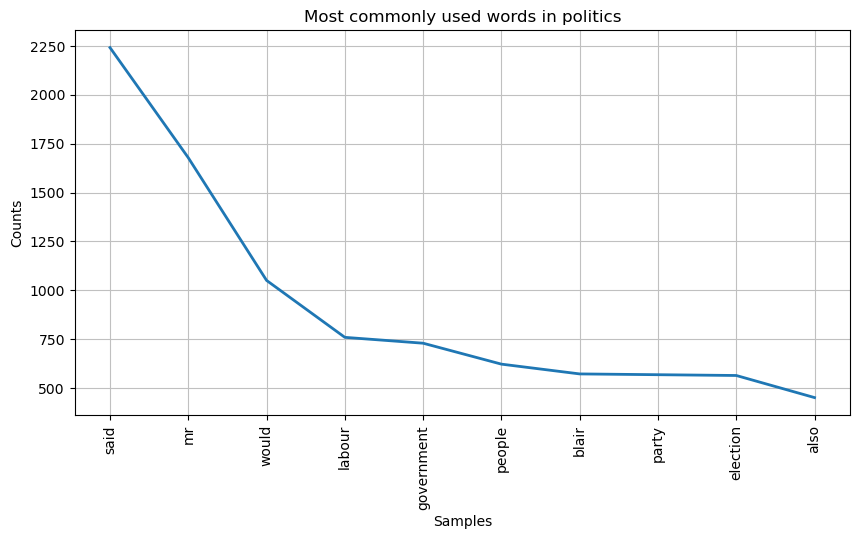

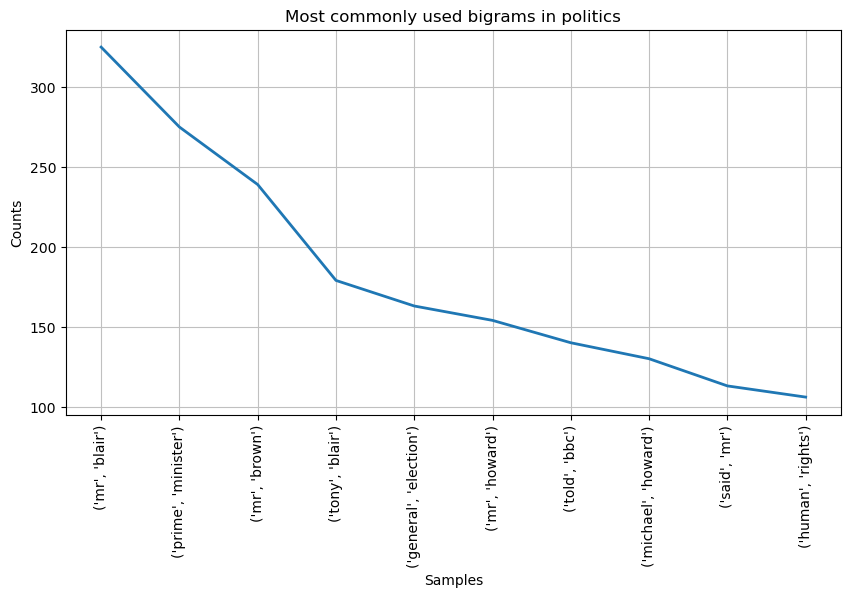

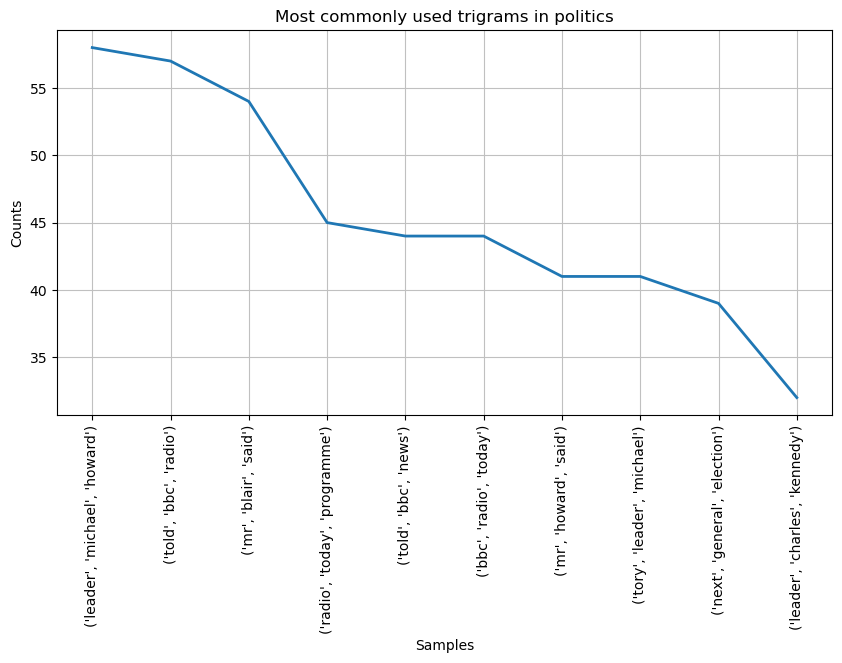

In [111]:
# your code here

# Function to plot a histogram for a given FreqDist
def plot_histogram(freq_dist, title, num=10):
    plt.figure(figsize=(10, 5))
    freq_dist.plot(num, title=title)
    plt.show()

# Loop to calculate frequency distributions in each category
for category in data['category'].unique():
    # Filter the DataFrame for the current category
    category_text = data[data['category'] == category]['text']
    
    # Tokenize and filter out the stopwords
    words = [
        word.lower() for text in category_text
        for word in nltk.word_tokenize(text) 
        if word.isalpha() and word.lower() not in stop_words
    ]
    
    # Create FreqDist for words
    word_freqdist = FreqDist(words)
    
    # Generate bigrams and trigrams
    bigrams = list(ngrams(words, 2))
    trigrams = list(ngrams(words, 3))
    
    # Create FreqDist for bigrams and trigrams
    bigram_freqdist = FreqDist(bigrams)
    trigram_freqdist = FreqDist(trigrams)
    
    # Plot histograms for most commonly used words, bigrams, and trigrams in each category
    print(f"\nCategory: {category}")
    plot_histogram(word_freqdist, f'Most commonly used words in {category}', num=10)
    plot_histogram(bigram_freqdist, f'Most commonly used bigrams in {category}', num=10)
    plot_histogram(trigram_freqdist, f'Most commonly used trigrams in {category}', num=10)






9. Create a word cloud of most commonly used words, bigrams and trigrams, by condition, if necessary.


Category: tech


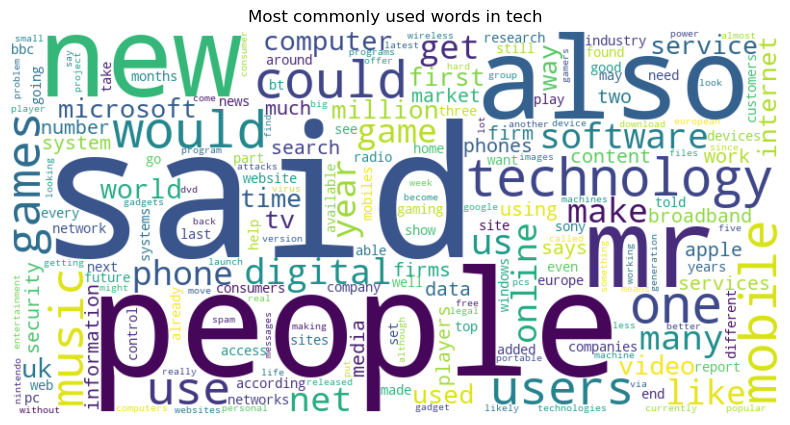

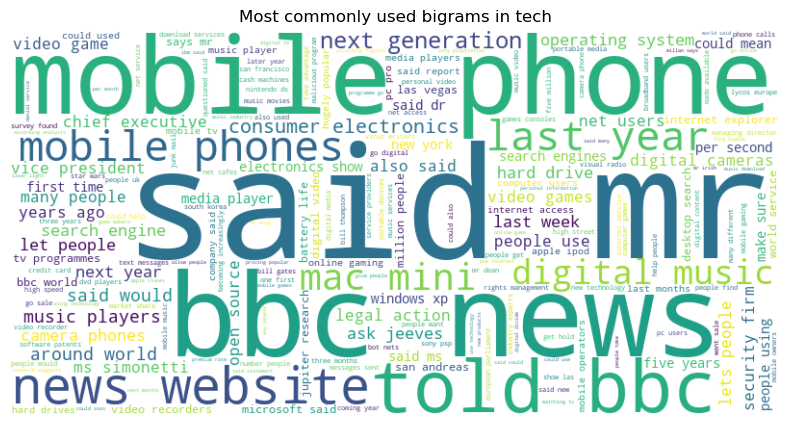

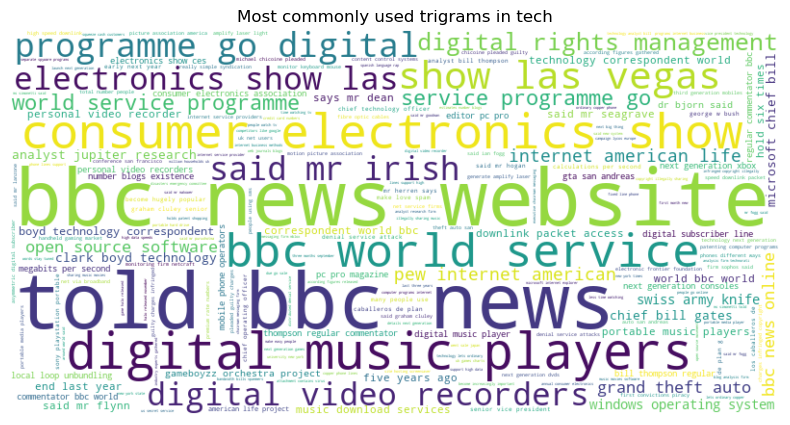


Category: business


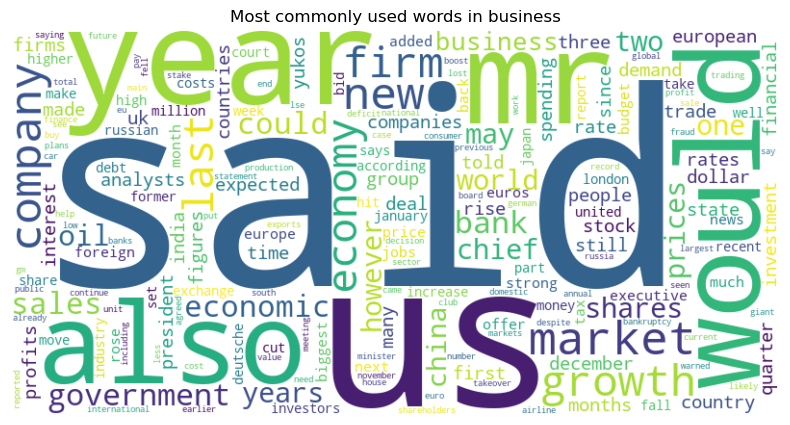

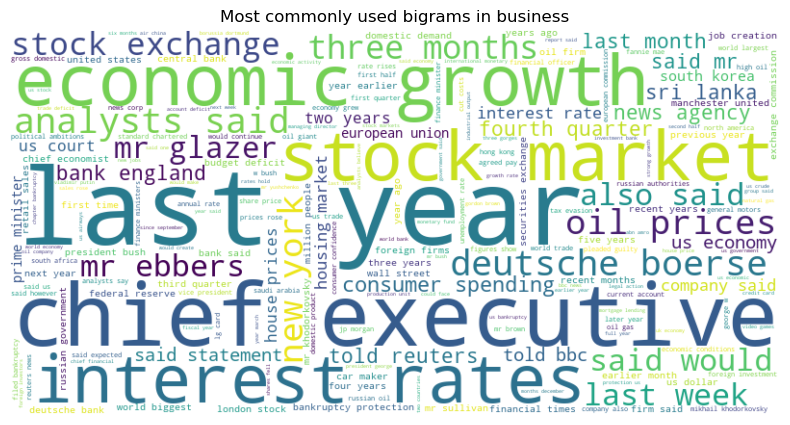

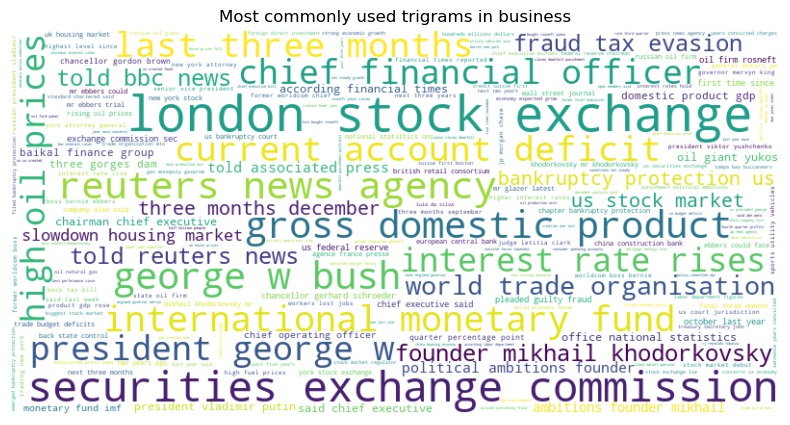


Category: sport


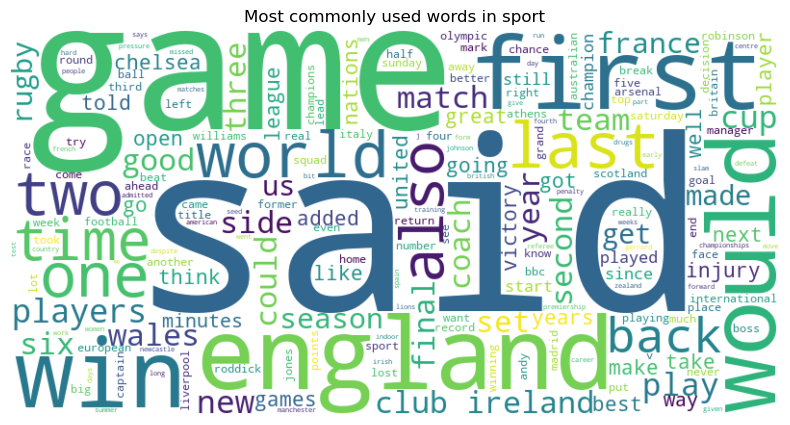

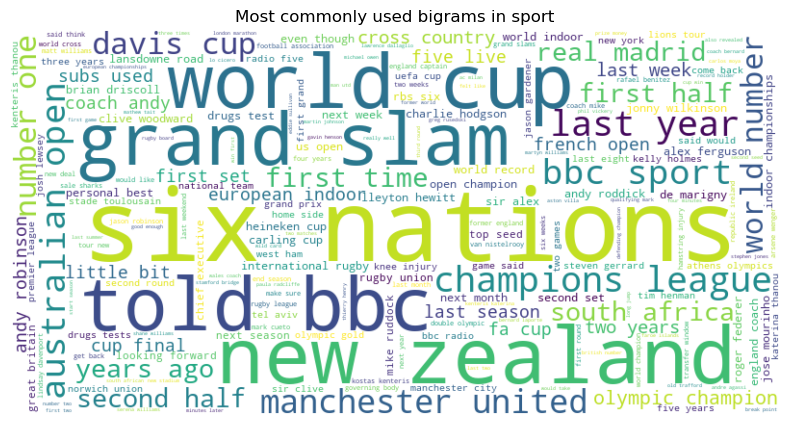

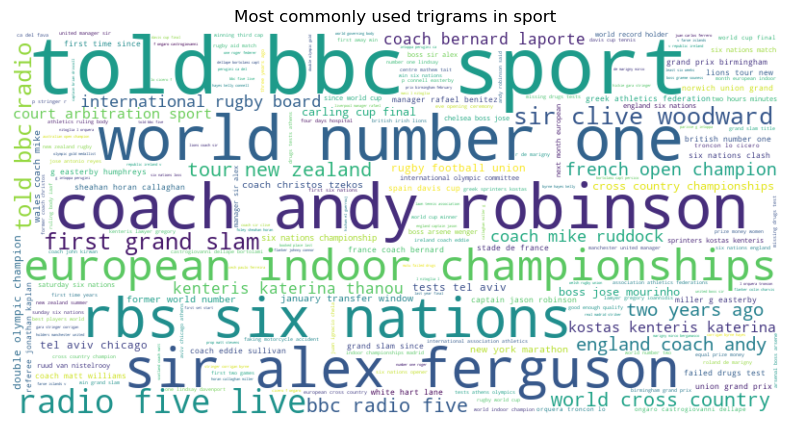


Category: entertainment


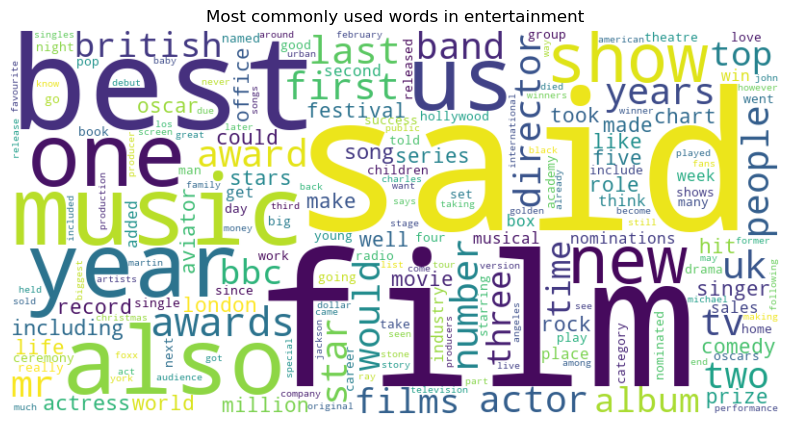

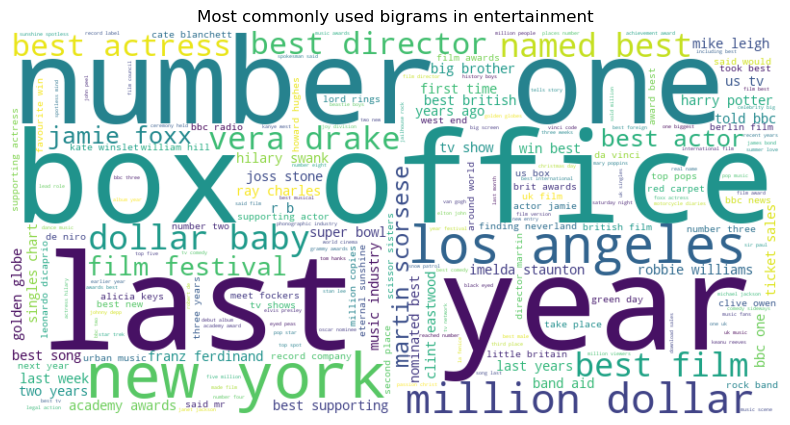

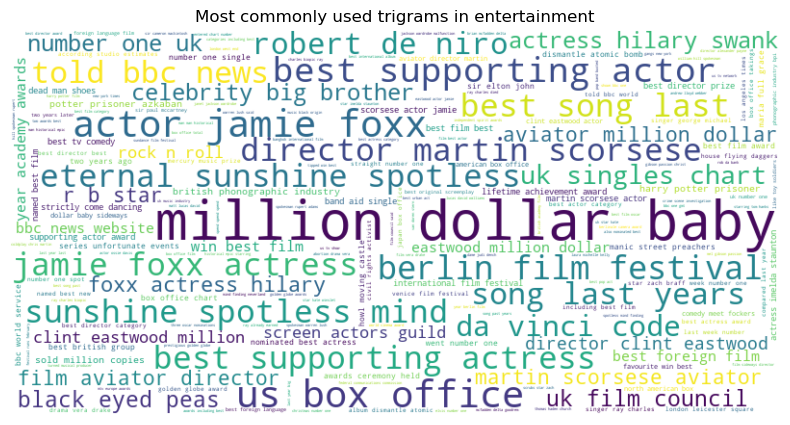


Category: politics


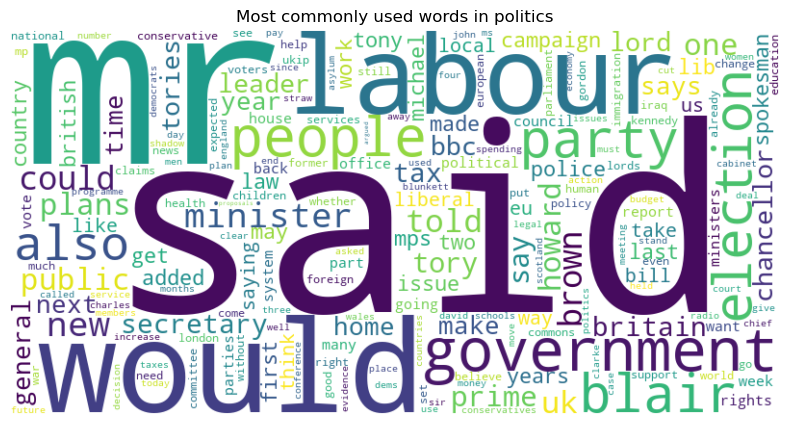

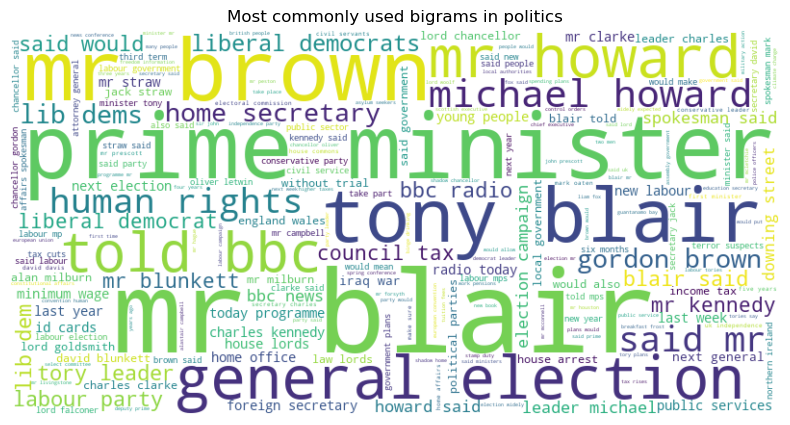

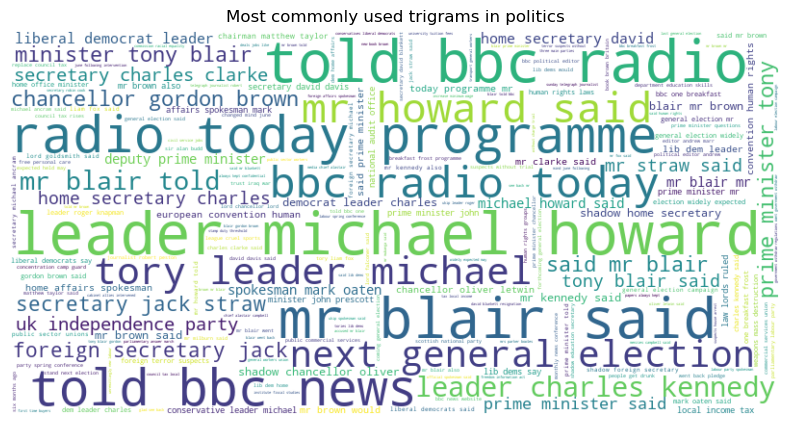

In [113]:
#your code here

# Function to generate and display a word cloud
def generate_word_cloud(freq_dist, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Loop to calculate frequency distributions in each category
for category in data['category'].unique():
    # Filter the DataFrame for the current category
    category_text = data[data['category'] == category]['text']
    
    # Tokenize and filter out the stopwords
    words = [
        word.lower() for text in category_text
        for word in nltk.word_tokenize(text) 
        if word.isalpha() and word.lower() not in stop_words
    ]
    
    # Create FreqDist for words
    word_freqdist = FreqDist(words)
    
    # Generate bigrams and trigrams
    bigrams = [' '.join(bigram) for bigram in ngrams(words, 2)]
    trigrams = [' '.join(trigram) for trigram in ngrams(words, 3)]
    
    # Create FreqDist for bigrams and trigrams
    bigram_freqdist = FreqDist(bigrams)
    trigram_freqdist = FreqDist(trigrams)
    
    # Generate word clouds for most commonly used words, bigrams, and trigrams in each category
    print(f"\nCategory: {category}")
    generate_word_cloud(word_freqdist, f'Most commonly used words in {category}')
    generate_word_cloud(bigram_freqdist, f'Most commonly used bigrams in {category}')
    generate_word_cloud(trigram_freqdist, f'Most commonly used trigrams in {category}')

